In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data_experiment1 = np.load("integrals_sorted_50Hz_10pucksRightOrder.npy")
data_experiment2 = np.load("integrals_sorted_50Hz_6pucksRightOrder.npy")
data_experiment3 = np.load("integrals_sorted_10pucksRightOrder.npy")
data_experiment4 = np.load("integrals_sorted_6pucksRightOrder.npy")
data_experiment = np.load("processed_data_10pucks.npy")

In [7]:
len(data_experiment1), len(data_experiment2), len(data_experiment3), len(data_experiment4), len(data_experiment.T)

(5625, 6985, 716, 873, 5191)

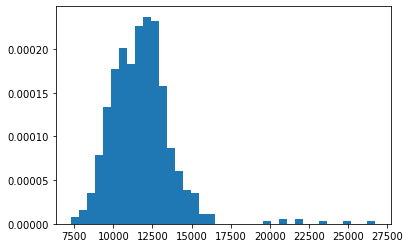

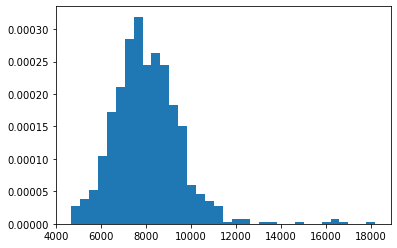

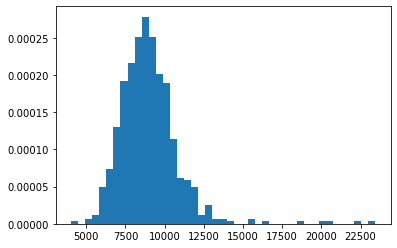

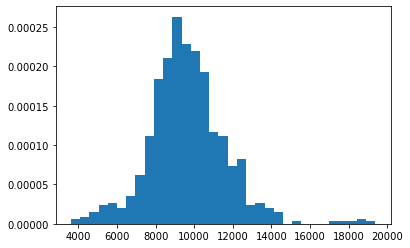

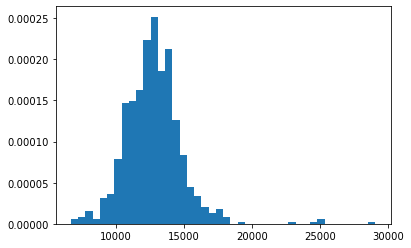

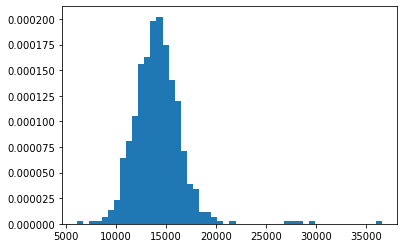

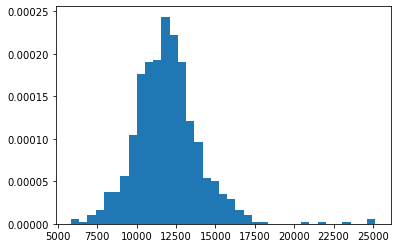

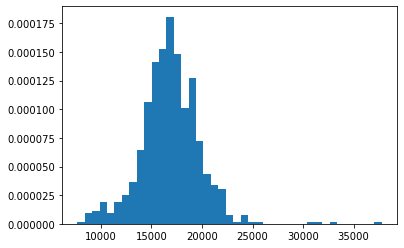

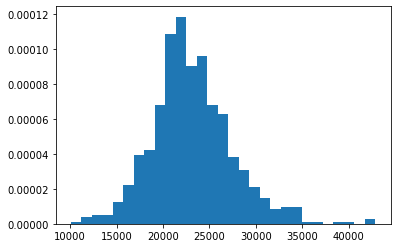

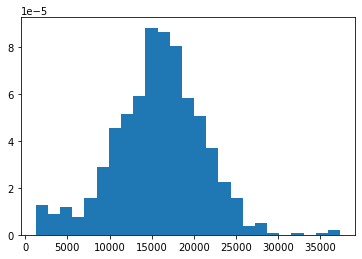

In [105]:
for i in range(10):
    plt.hist(data_experiment3[:, i][data_experiment3[:, i]>100], bins='fd', density=True)
    #plt.hist(data_experiment4[:, i][data_experiment4[:, i]>100], bins=30, density=True, alpha=0.7)
    #plt.hist(data_experiment[i], bins=30, density=True, alpha=0.7)
    plt.show()

In [11]:
def norm(x, mu, sigma):
    """
    normal distribution
    """
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

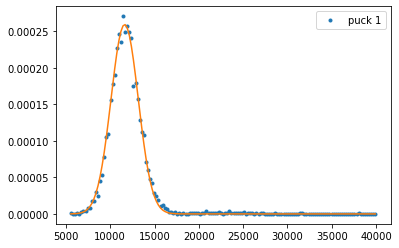

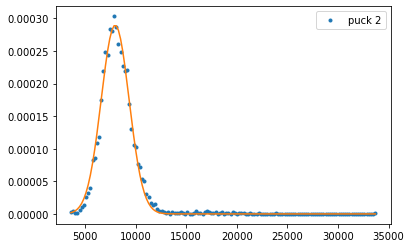

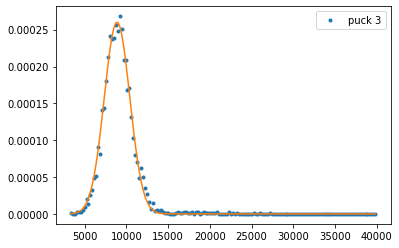

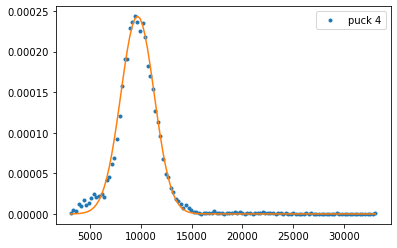

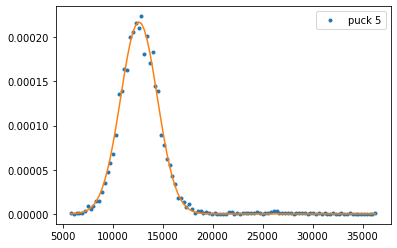

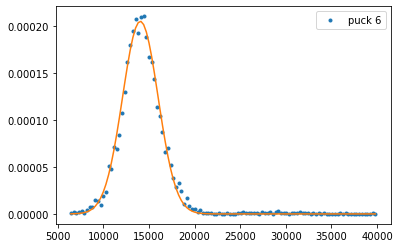

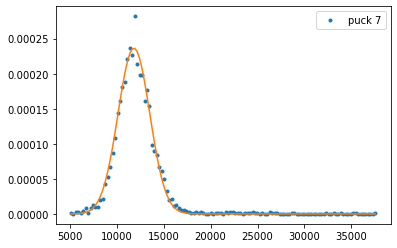

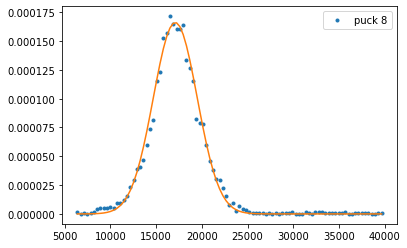

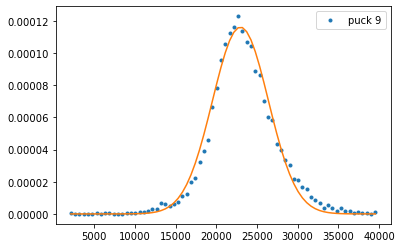

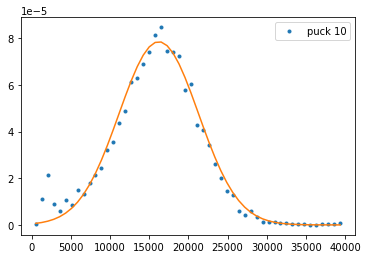

In [86]:
popts = np.zeros((10,2))
for i in range(10):
    yhist, binedges = np.histogram(data_experiment1[:, i][(data_experiment1[:, i]>100)], bins='auto', density=True)
    
    bincenters = np.mean(np.vstack([binedges[0:-1], binedges[1:]]), axis=0)

    y = yhist[(bincenters < 40000)]
    x = bincenters[(bincenters < 40000)]
    plt.plot(x, y, '.', label='puck ' + str(i+1))

    popt, pcov = curve_fit(f = norm, xdata= x, ydata = y,
                                   p0 = [10*1000,  3*1000], maxfev=5000)
    
    popts[i] = popt
    plt.plot(x, norm(x, *popt))
    plt.legend()
    #plt.hist(data_experiment3[:, i][data_experiment3[:, i]>100], bins=30, density=True)
    plt.show()